# Data Signals analysis

[action] add necessary git language for Google

## verify GCP authentication

In [8]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/Users/mikegoodman/Documents/developer/key_file.json"

In [9]:
def implicit():
    from google.cloud import storage

    # If you don't specify credentials when constructing the client, the
    # client library will look for credentials in the environment.
    storage_client = storage.Client()

    # Make an authenticated API request
    buckets = list(storage_client.list_buckets())
    print(buckets)

implicit()

[<Bucket: cloud-ai-platform-48caf8e2-ec0f-4328-ad4a-39db976d1c6a>, <Bucket: gcf-sources-253822301702-us-central1>, <Bucket: mg-ce-playground>, <Bucket: mg-ce-playground-demos>, <Bucket: us.artifacts.mg-ce-playground.appspot.com>, <Bucket: vertex-ai-demos-mg>]


## download data signals dataset from BQ

In [39]:
# install packages
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt

from google.cloud import bigquery

In [17]:
bqclient = bigquery.Client()

# Download query results.
query_string = """
SELECT
    *
FROM
    `bigquery-public-data.google_trends.top_terms` AS t0
WHERE
    EXTRACT(year FROM t0.refresh_date) = 2021 AND
    EXTRACT(month FROM t0.refresh_date) = 10
ORDER BY
    t0.refresh_date DESC,
    t0.rank ASC
"""

df = (bqclient.query(query_string).result().to_dataframe(create_bqstorage_client=True,))
# Optionally, explicitly request to use the BigQuery Storage API. As of
# google-cloud-bigquery version 1.26.0 and above, the BigQuery Storage
# API is used by default.

print(df.head())

                            dma_name  dma_id       term        week  score  \
0  Greenville-New Bern-Washington NC     545  Halloween  2018-09-23   34.0   
1                      Wilmington NC     550  Halloween  2017-10-15   56.0   
2                     Chattanooga TN     575  Halloween  2020-10-18   48.0   
3                         Atlanta GA     524  Halloween  2018-09-30   37.0   
4                         Atlanta GA     524  Halloween  2021-10-24   76.0   

   rank refresh_date  
0     1   2021-10-31  
1     1   2021-10-31  
2     1   2021-10-31  
3     1   2021-10-31  
4     1   2021-10-31  


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28722973 entries, 0 to 28722972
Data columns (total 7 columns):
 #   Column        Dtype  
---  ------        -----  
 0   dma_name      object 
 1   dma_id        int64  
 2   term          object 
 3   week          object 
 4   score         float64
 5   rank          int64  
 6   refresh_date  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 1.5+ GB


In [32]:
df = df.fillna(0)

In [60]:
df_hall_atl = df[(df['term'] == 'Halloween') & (df['dma_name'] == 'Atlanta GA')]
df_hall_atl

,dma_name,dma_id,term,week,score,rank,refresh_date
3,Atlanta GA,524,Halloween,2018-09-30,37.0,1,2021-10-31
4,Atlanta GA,524,Halloween,2021-10-24,76.0,1,2021-10-31
149,Atlanta GA,524,Halloween,2017-06-11,1.0,1,2021-10-31
150,Atlanta GA,524,Halloween,2019-01-06,1.0,1,2021-10-31
248,Atlanta GA,524,Halloween,2019-06-09,2.0,1,2021-10-31
...,...,...,...,...,...,...,...
54235,Atlanta GA,524,Halloween,2017-04-30,1.0,1,2021-10-31
54444,Atlanta GA,524,Halloween,2017-07-23,3.0,1,2021-10-31
54445,Atlanta GA,524,Halloween,2018-06-03,3.0,1,2021-10-31
54564,Atlanta GA,524,Halloween,2018-09-09,13.0,1,2021-10-31


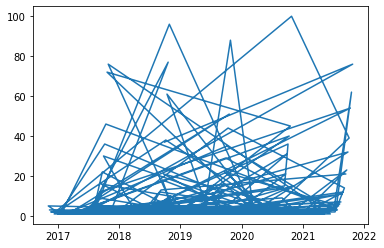

In [61]:
plt.plot(df_hall_atl['week'], df_hall_atl['score'])
plt.show()

In [58]:
df[(df['term'] == 'Halloween') & (df['dma_name'] == 'Atlanta GA')]['score']

3        37.0
4        76.0
149       1.0
150       1.0
248       2.0
         ... 
54235     1.0
54444     3.0
54445     3.0
54564    13.0
54589    21.0
Name: score, Length: 260, dtype: float64